# Image Classifier PC vs. Mac

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

## Data

Data retrieved from google using the following via the javascript console. 
Files with image urls are present in the data directory.

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

In [ ]:
path = f'./data/pc-vs-mac'

In [ ]:
classes = ["pc", "mac"]

In [5]:
for c in classes:
    download_images(f'{path}/{c}.txt', f'./data/pc-vs-mac/{c}', max_pics=200)
    verify_images(f'{path}/{c}', delete=True, max_size=500)

In [6]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=get_transforms(), size=224)

## Training

In [7]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.931417,0.627881,0.319444
2,0.758446,0.519319,0.263889
3,0.637454,0.495306,0.250000
4,0.549401,0.446486,0.236111


## Inference

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

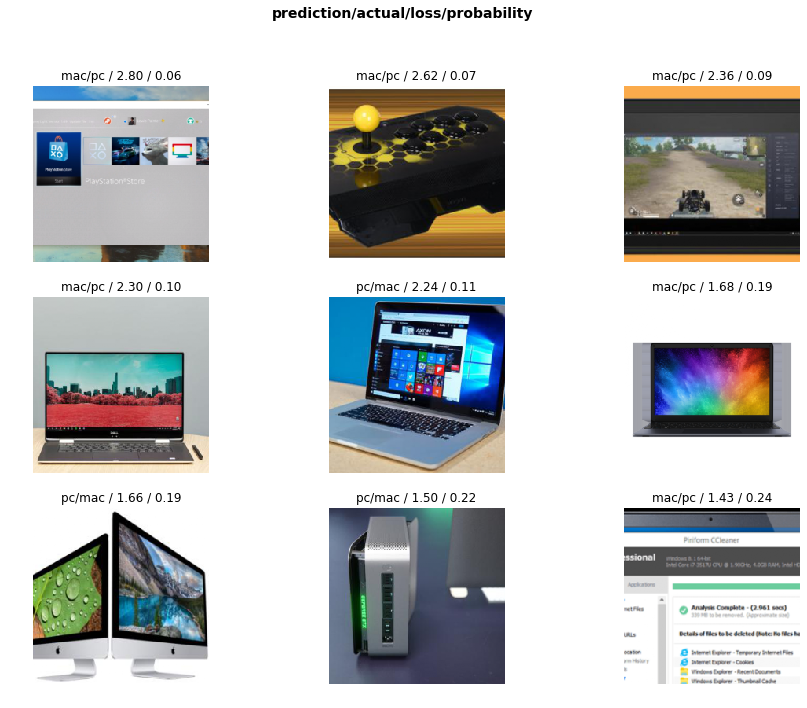

In [12]:
interp.plot_top_losses(9, figsize=(15,11))